In [2]:
import cobra
import os
from os.path import join
from cobra.flux_analysis import calculate_phenotype_phase_plane
import pandas
pandas.options.display.max_rows = 100

data_dir = "/Users/david/Dropbox (UCSD SBRG)/Xam_Multistrain_Recon/Metabolic_model/BiGG_Model/"
xam_model = cobra.io.read_sbml_model(join(data_dir, "Xam_BiGG_minimal_media.xml"))

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from time import time

import pandas
pandas.options.display.max_rows = 300

%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

from cobra.flux_analysis.loopless import construct_loopless_model

### Original model

In [3]:
print (len(xam_model.reactions))
print (len(xam_model.metabolites))
print (len(xam_model.genes))

1546
1518
878


In [4]:
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s\t%s\t%s\t%i' % (reaction.id, reaction.reaction, reaction.lower_bound, reaction.upper_bound))

EX_2ddglcn_e	2ddglcn_e --> 	0.0	1000
EX_4hbz_e	4hbz_e <=> 	-10.0	1000
EX_ac_e	ac_e --> 	0.0	1000
EX_acald_e	acald_e --> 	0.0	1000
EX_acgam_e	acgam_e --> 	0.0	1000
EX_adn_e	adn_e --> 	0.0	1000
EX_akg_e	akg_e --> 	0.0	1000
EX_ala__D_e	ala__D_e --> 	0.0	1000
EX_arab__L_e	arab__L_e --> 	0.0	0
EX_arbt_e	arbt_e --> 	0.0	1000
EX_arg__L_e	arg__L_e <=> 	-10.0	1000
EX_ASPt5n_e	asp__L_e --> 	0.0	1000
EX_Biomass_e	BIOMASS_c --> 	0.0	1000
EX_ca2_e	ca2_e <=> 	-10.0	1000
EX_cbl1_e	cbl1_e --> 	0.0	1000
EX_cd2_e	cd2_e --> 	0.0	1000
EX_chol_e	chol_e --> 	0.0	1000
EX_cit_e	cit_e --> 	0.0	1000
EX_cl_e	cl_e <=> 	-10.0	1000
EX_co2_e	co2_e --> 	0.0	1000
EX_cobalt2_e	cobalt2_e <=> 	-10.0	1000
EX_cu2_e	cu2_e <=> 	-10.0	1000
EX_cytd_e	cytd_e --> 	0.0	1000
EX_dad_2_e	dad_2_e --> 	0.0	1000
EX_dcyt_e	dcyt_e --> 	0.0	1000
EX_dgsn_e	dgsn_e --> 	0.0	1000
EX_din_e	din_e --> 	0.0	1000
EX_DNA_e	dna_c <-- 	-10.0	0
EX_duri_e	duri_e --> 	0.0	1000
EX_etha_e	etha_e --> 	0.0	1000
EX_etoh_e	etoh_e --> 	0.0	1000
EX_fe2_e	fe2_e 

### FBA

In [5]:
FBA_sol = xam_model.optimize()
print (FBA_sol)

<Solution 1.73 at 0x119036390>


In [6]:
xam_model.solution.status

'optimal'

In [7]:
FBA_results = xam_model.solution.x_dict
fba_df = pandas.DataFrame.from_dict(FBA_results, orient='index').T.round(5)
fba_df_t = pandas.DataFrame.transpose(fba_df)
fba_df_t = fba_df_t.rename_axis("Reaction")
fba_df_t = fba_df_t.rename_axis({0: "Flux"}, axis="columns")
print(fba_df_t)
fba_df_t.to_csv('Flux_results.csv', sep=',')

                        Flux
Reaction                    
CSND                 0.00000
MNXR8691             0.00000
NTD10                0.00000
NTD11                0.00000
GLYBabc              0.00000
XTSNH                0.28957
DDPA                -0.49355
P5CD                 0.31984
P5CR             -1000.00000
GLUTRR              -0.08595
GLUTRS              -0.08595
MG2t                 0.00537
KARI_23dhmp          0.56728
ACALDt               0.00000
CO2t               -12.88534
MNXR3469             0.00000
KARI_23dhmb        998.72691
GUDBUTNAH           -9.57201
PANTS               -0.01074
E4PD                 0.00000
PLIPA2A180pp         0.00000
MNXR87148            0.17356
TDPGDH               0.04339
CYTDt2               0.00000
MNXR8073             0.00000
CYOO2pp              0.00000
GAPDH_nadp_hi     1000.00000
rxn05379_c0         -0.14779
MNXR2826            -0.00000
ADSL2r              -0.54074
UAGPT3              -0.04339
UAGPT2               0.00000
GART          

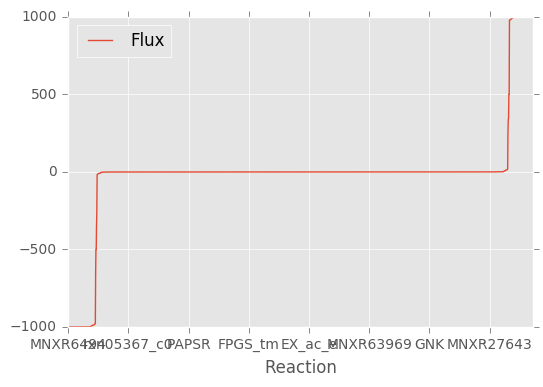

In [8]:
fba_df_sort = fba_df_t.sort_values(by="Flux")
plt.figure()
fba_df_sort.plot.line()

### FVA

In [9]:
fva_results = cobra.flux_analysis.flux_variability_analysis(xam_model, xam_model.reactions, fraction_of_optimum=0.9)
fva_df = pandas.DataFrame.from_dict(fva_results).T.round(5)
fva_df.index.name = 'reaction'
print(fva_df)

                  maximum     minimum
reaction                             
10FTHFGLULL       0.00000     0.00000
2DHPFALDL         0.00000     0.00000
2HBO              0.00000     0.00000
2OH3K5MPPISO      0.00000     0.00000
34DHOXPEGOX       0.00000     0.00000
34HPPOR           0.00000     0.00000
3HAO              0.00000     0.00000
3HBCOAHL          0.00000    -8.36252
3HLYTCL           0.00000     0.00000
3OAR100           0.00000     0.00000
3OAR120           0.00000     0.00000
3OAR40_1          0.00000     0.00000
3OAR60            0.00000     0.00000
3OAR80            0.00000     0.00000
3OAS80            0.00000     0.00000
4ABUTD            0.00000     0.00000
4CMLCL_kt         0.00000     0.00000
4HTHRS            0.00000     0.00000
56DH5FLURAAMH     0.00000     0.00000
5FLURAPRT         0.00000     0.00000
5HLTDL            0.00000     0.00000
5HXKYNDCL         0.00000     0.00000
A5PISO           -0.11716    -0.13017
AACOAR_syn     1000.00000 -1000.00000
AACOAT      

In [10]:
fva_df_sort = fva_df.sort_values(by=['maximum', 'minimum'])
print(fva_df_sort)

                  maximum     minimum
reaction                             
H2Ot            -10.97961   -32.96398
EX_glc__D_e      -9.00000   -10.00000
EX_arg__L_e      -6.10614   -10.00000
CO2t             -4.52169   -18.59681
ASPATh           -1.99120 -1000.00000
GALh             -1.92831 -1000.00000
EX_DNA_e         -1.56141    -1.73489
EX_protein_e     -1.56141    -1.73489
EX_rna_c0        -1.56141    -1.73489
MCOATA           -1.55704    -1.73004
EX_pi_e          -1.25333   -10.00000
APLh             -1.14578    -9.50830
PRPPS            -0.93844  -999.28186
NDPK2            -0.61057  -501.43559
ICH              -0.61043    -8.00567
IMDHT            -0.58613    -0.79905
IPMD             -0.58613    -0.79905
IPPS             -0.58613    -0.79905
OMCDC            -0.58613    -0.79905
MNXR79878        -0.48667 -1000.00000
ADSL2r           -0.48667    -2.43360
GLUPRT           -0.48667    -2.43360
PPRGL            -0.48667    -2.43360
PRAIS            -0.48667    -2.43360
PRAISh      

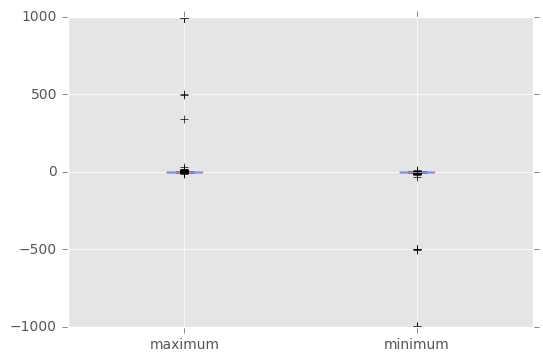

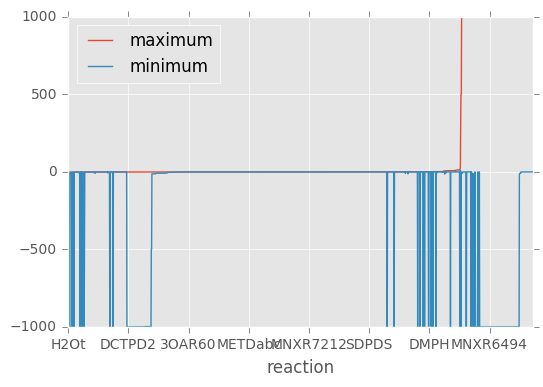

In [11]:
plt.figure(dpi=400)
fva_df_sort.plot.box()
#plt.savefig('FVA_Xam_box_50.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_box_50.png', format='png', dpi=1200)
fva_df_sort.plot.line()
#plt.savefig('FVA_Xam_plot_50.svg', format='svg', dpi=1200)
#plt.savefig('FVA_Xam_plot_50.png', format='png', dpi=1200)

### Active Fluxes

In [12]:
import numpy

fva_df_sort_equal = fva_df_sort[(fva_df_sort["maximum"] > 500) & (fva_df_sort["minimum"] < -500)]
print(fva_df_sort_equal)

                   maximum     minimum
reaction                              
HXAND            998.08281  -998.34342
IMPD             998.08281  -998.34342
ADNK1            998.32409 -1000.00000
PIabc            998.74667 -1000.00000
KARI_23dhmb      998.85422 -1000.00000
BCTA_glu_h       999.41387 -1000.00000
SADT             999.66222 -1000.00000
SADT2            999.66222 -1000.00000
G3PD             999.70073 -1000.00000
NDPK8            999.70954 -1000.00000
AGTi             999.74710  -998.98361
GAPD             999.90963 -1000.00000
R01465m          999.91123 -1000.00000
ALAR             999.92190 -1000.00000
DAAD             999.92190 -1000.00000
NADK             999.93110 -1000.00000
MNXR94202        999.95012 -1000.00000
MNXR94226        999.95012 -1000.00000
GK2              999.97499  -999.73455
ADOCBIK          999.99517 -1000.00000
MNXR85460        999.99517 -1000.00000
MNXR94325        999.99517  -999.93593
AACOAR_syn      1000.00000 -1000.00000
ATGDm           1000.0000

In [13]:
print(len(fva_df_sort_equal))

154


### Sensitivity Analyses

#### Glucose vs. O2

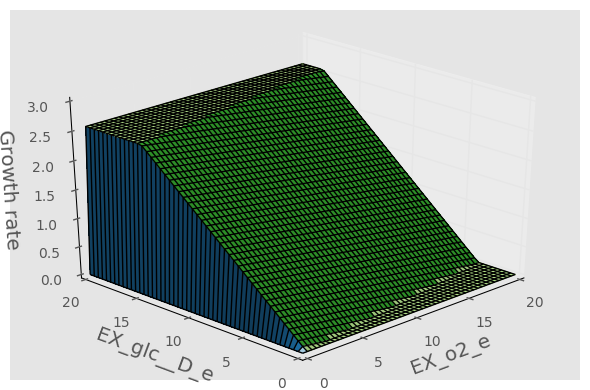

In [14]:
data = calculate_phenotype_phase_plane(xam_model, "EX_o2_e", "EX_glc__D_e")
data.plot_matplotlib();

#### Glucose Vs. CO2 without O2

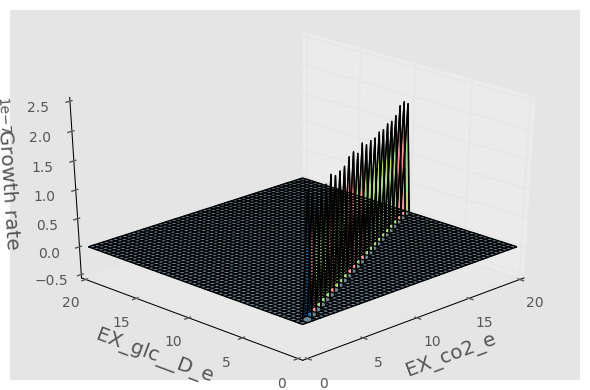

In [14]:
xam_model.reactions.get_by_id("EX_o2_e").lower_bound = 0
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = -20
data = calculate_phenotype_phase_plane(xam_model, "EX_co2_e", "EX_glc__D_e")
data.plot_matplotlib();
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = 0
xam_model.reactions.get_by_id("EX_o2_e").lower_bound = -20

#### Glucose Vs. CO2 with O2

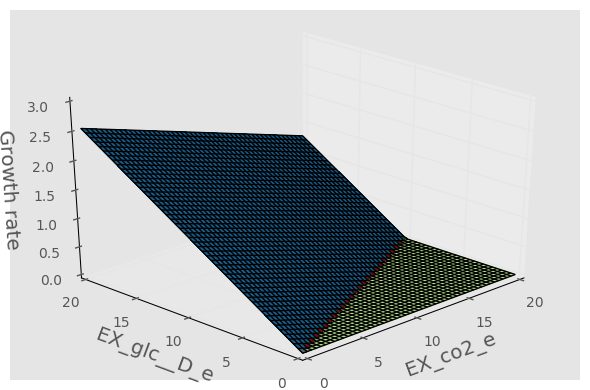

In [15]:
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = -20
data = calculate_phenotype_phase_plane(xam_model, "EX_co2_e", "EX_glc__D_e")
data.plot_matplotlib();
xam_model.reactions.get_by_id("EX_co2_e").lower_bound = 0

#### Carbon Source Vs. O2

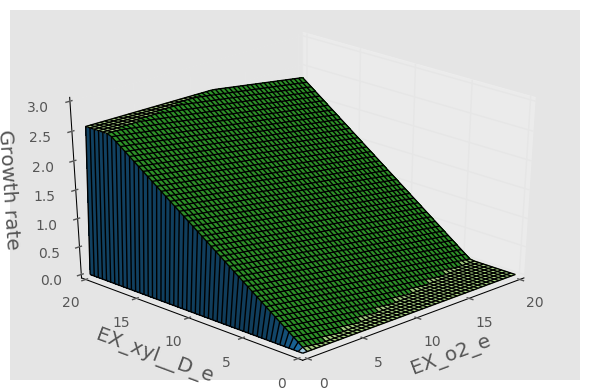

In [16]:
xam_model.reactions.get_by_id("EX_glc__D_e").lower_bound = 0
xam_model.reactions.get_by_id("EX_for_e").lower_bound = -10
data = calculate_phenotype_phase_plane(xam_model, "EX_o2_e", "EX_xyl__D_e")
data.plot_matplotlib();
xam_model.reactions.get_by_id("EX_glc__D_e").lower_bound = -10
xam_model.reactions.get_by_id("EX_for_e").lower_bound = 0

#### Glucose Vs. Other

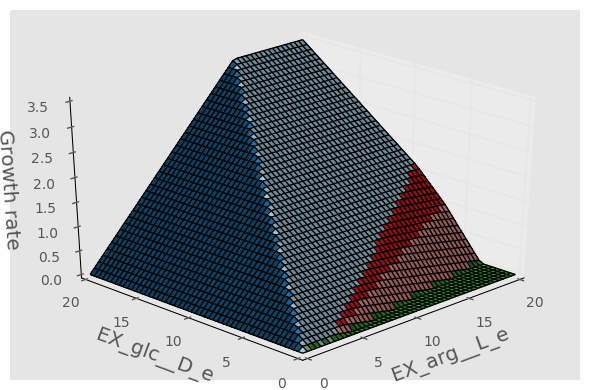

In [17]:
data = calculate_phenotype_phase_plane(xam_model, "EX_arg__L_e", "EX_glc__D_e")
data.plot_matplotlib();

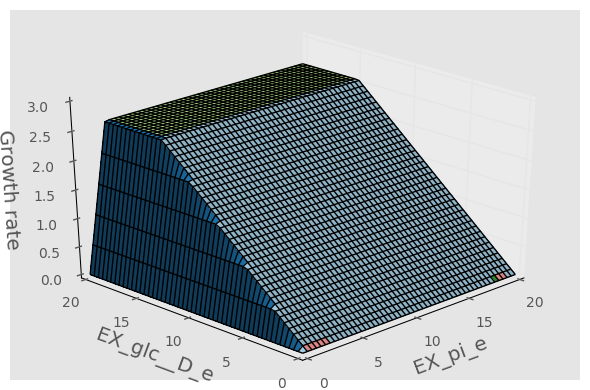

In [18]:
data = calculate_phenotype_phase_plane(xam_model, "EX_pi_e", "EX_glc__D_e")
data.plot_matplotlib();

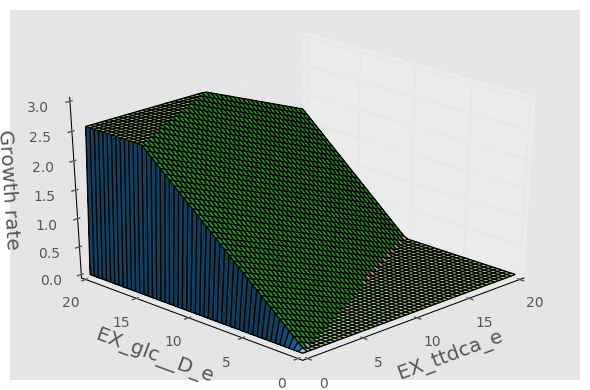

In [19]:
data = calculate_phenotype_phase_plane(xam_model, "EX_ttdca_e", "EX_glc__D_e")
data.plot_matplotlib();

### Exchange reactions

In [15]:
for i in [i.id for i in xam_model.reactions if len(i.metabolites) == 1]:
    reaction = xam_model.reactions.get_by_id(i)
    print('%s\t%s\t%s\t%i\t%i' % (reaction.id, reaction.name, reaction.reaction, reaction.lower_bound, reaction.upper_bound))

EX_2ddglcn_e	None	2ddglcn_e --> 	0	1000
EX_4hbz_e	None	4hbz_e <=> 	-10	1000
EX_ac_e	None	ac_e --> 	0	1000
EX_acald_e	None	acald_e --> 	0	1000
EX_acgam_e	None	acgam_e --> 	0	1000
EX_adn_e	None	adn_e --> 	0	1000
EX_akg_e	None	akg_e --> 	0	1000
EX_ala__D_e	None	ala__D_e --> 	0	1000
EX_arab__L_e	None	arab__L_e --> 	0	0
EX_arbt_e	None	arbt_e --> 	0	1000
EX_arg__L_e	None	arg__L_e <=> 	-10	1000
EX_ASPt5n_e	None	asp__L_e --> 	0	1000
EX_Biomass_e	None	BIOMASS_c --> 	0	1000
EX_ca2_e	None	ca2_e <=> 	-10	1000
EX_cbl1_e	None	cbl1_e --> 	0	1000
EX_cd2_e	None	cd2_e --> 	0	1000
EX_chol_e	None	chol_e --> 	0	1000
EX_cit_e	None	cit_e --> 	0	1000
EX_cl_e	None	cl_e <=> 	-10	1000
EX_co2_e	None	co2_e --> 	0	1000
EX_cobalt2_e	None	cobalt2_e <=> 	-10	1000
EX_cu2_e	None	cu2_e <=> 	-10	1000
EX_cytd_e	None	cytd_e --> 	0	1000
EX_dad_2_e	None	dad_2_e --> 	0	1000
EX_dcyt_e	None	dcyt_e --> 	0	1000
EX_dgsn_e	None	dgsn_e --> 	0	1000
EX_din_e	None	din_e --> 	0	1000
EX_DNA_e	None	dna_c <-- 	-10	0
EX_duri_e	None	duri_e --